## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.109916  0.759207  1.198635 -0.999199  0.491227  0.418017
1  0.875530  0.192556  0.149393  1.715383  1.402761  1.898435
2  0.867480  0.912698 -0.790505 -0.842927  0.412809  0.230369
3 -0.340876 -0.533917 -1.482358 -1.472583  0.321053 -0.697986
4 -0.411356 -0.011772 -1.621884 -0.712137 -1.425665 -0.360452


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0228031	total: 56.3ms	remaining: 56.2s
1:	learn: 1.0133165	total: 56.8ms	remaining: 28.3s
2:	learn: 1.0014959	total: 57.2ms	remaining: 19s
3:	learn: 0.9911087	total: 57.7ms	remaining: 14.4s
4:	learn: 0.9784668	total: 58.3ms	remaining: 11.6s
5:	learn: 0.9679616	total: 59ms	remaining: 9.77s
6:	learn: 0.9556828	total: 59.6ms	remaining: 8.45s
7:	learn: 0.9455717	total: 60ms	remaining: 7.45s
8:	learn: 0.9361553	total: 60.6ms	remaining: 6.68s
9:	learn: 0.9260379	total: 61.2ms	remaining: 6.06s
10:	learn: 0.9160859	total: 61.7ms	remaining: 5.55s
11:	learn: 0.9059834	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8962419	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8874920	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8800794	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8720515	total: 64.3ms	remaining: 3.95s
16:	learn: 0.8630199	total: 64.8ms	remaining: 3.75s
17:	learn: 0.8541289	total: 65.2ms	remaining: 3.56s
18:	learn: 0.8448786	total: 65.7ms	remaining: 3.39

104:	learn: 0.3871433	total: 107ms	remaining: 913ms
105:	learn: 0.3841988	total: 108ms	remaining: 907ms
106:	learn: 0.3814443	total: 108ms	remaining: 902ms
107:	learn: 0.3784991	total: 109ms	remaining: 897ms
108:	learn: 0.3759034	total: 109ms	remaining: 890ms
109:	learn: 0.3733687	total: 109ms	remaining: 885ms
110:	learn: 0.3708042	total: 110ms	remaining: 881ms
111:	learn: 0.3680477	total: 110ms	remaining: 876ms
112:	learn: 0.3650769	total: 111ms	remaining: 871ms
113:	learn: 0.3620175	total: 112ms	remaining: 867ms
114:	learn: 0.3590921	total: 112ms	remaining: 863ms
115:	learn: 0.3561088	total: 113ms	remaining: 858ms
116:	learn: 0.3529318	total: 113ms	remaining: 854ms
117:	learn: 0.3502371	total: 114ms	remaining: 850ms
118:	learn: 0.3476308	total: 114ms	remaining: 845ms
119:	learn: 0.3454283	total: 115ms	remaining: 841ms
120:	learn: 0.3427163	total: 115ms	remaining: 836ms
121:	learn: 0.3404405	total: 116ms	remaining: 832ms
122:	learn: 0.3381050	total: 116ms	remaining: 828ms
123:	learn: 

276:	learn: 0.1214649	total: 187ms	remaining: 487ms
277:	learn: 0.1207773	total: 187ms	remaining: 486ms
278:	learn: 0.1199435	total: 188ms	remaining: 485ms
279:	learn: 0.1191388	total: 188ms	remaining: 483ms
280:	learn: 0.1185241	total: 188ms	remaining: 482ms
281:	learn: 0.1176843	total: 189ms	remaining: 481ms
282:	learn: 0.1169392	total: 189ms	remaining: 480ms
283:	learn: 0.1163392	total: 190ms	remaining: 479ms
284:	learn: 0.1156920	total: 190ms	remaining: 478ms
285:	learn: 0.1149611	total: 191ms	remaining: 477ms
286:	learn: 0.1142144	total: 191ms	remaining: 475ms
287:	learn: 0.1136473	total: 192ms	remaining: 475ms
288:	learn: 0.1129873	total: 192ms	remaining: 473ms
289:	learn: 0.1124030	total: 193ms	remaining: 472ms
290:	learn: 0.1117925	total: 193ms	remaining: 471ms
291:	learn: 0.1111851	total: 194ms	remaining: 470ms
292:	learn: 0.1104870	total: 194ms	remaining: 469ms
293:	learn: 0.1097923	total: 195ms	remaining: 468ms
294:	learn: 0.1091957	total: 195ms	remaining: 467ms
295:	learn: 

491:	learn: 0.0412275	total: 290ms	remaining: 300ms
492:	learn: 0.0411004	total: 291ms	remaining: 299ms
493:	learn: 0.0409368	total: 292ms	remaining: 299ms
494:	learn: 0.0408473	total: 292ms	remaining: 298ms
495:	learn: 0.0406363	total: 292ms	remaining: 297ms
496:	learn: 0.0404277	total: 293ms	remaining: 296ms
497:	learn: 0.0402288	total: 293ms	remaining: 296ms
498:	learn: 0.0400256	total: 294ms	remaining: 295ms
499:	learn: 0.0399460	total: 294ms	remaining: 294ms
500:	learn: 0.0397590	total: 295ms	remaining: 294ms
501:	learn: 0.0395761	total: 295ms	remaining: 293ms
502:	learn: 0.0394079	total: 296ms	remaining: 292ms
503:	learn: 0.0393305	total: 296ms	remaining: 292ms
504:	learn: 0.0391661	total: 297ms	remaining: 291ms
505:	learn: 0.0389868	total: 297ms	remaining: 290ms
506:	learn: 0.0388298	total: 298ms	remaining: 290ms
507:	learn: 0.0386539	total: 298ms	remaining: 289ms
508:	learn: 0.0385026	total: 299ms	remaining: 288ms
509:	learn: 0.0383852	total: 299ms	remaining: 287ms
510:	learn: 

656:	learn: 0.0216838	total: 369ms	remaining: 193ms
657:	learn: 0.0215882	total: 370ms	remaining: 192ms
658:	learn: 0.0215121	total: 370ms	remaining: 192ms
659:	learn: 0.0214961	total: 371ms	remaining: 191ms
660:	learn: 0.0214033	total: 371ms	remaining: 190ms
661:	learn: 0.0213293	total: 372ms	remaining: 190ms
662:	learn: 0.0213134	total: 372ms	remaining: 189ms
663:	learn: 0.0212233	total: 372ms	remaining: 188ms
664:	learn: 0.0212076	total: 373ms	remaining: 188ms
665:	learn: 0.0211324	total: 374ms	remaining: 187ms
666:	learn: 0.0210497	total: 374ms	remaining: 187ms
667:	learn: 0.0209785	total: 374ms	remaining: 186ms
668:	learn: 0.0208777	total: 375ms	remaining: 186ms
669:	learn: 0.0208120	total: 375ms	remaining: 185ms
670:	learn: 0.0207968	total: 376ms	remaining: 184ms
671:	learn: 0.0207818	total: 376ms	remaining: 184ms
672:	learn: 0.0207175	total: 377ms	remaining: 183ms
673:	learn: 0.0207027	total: 377ms	remaining: 182ms
674:	learn: 0.0206316	total: 378ms	remaining: 182ms
675:	learn: 

876:	learn: 0.0112088	total: 473ms	remaining: 66.3ms
877:	learn: 0.0111692	total: 473ms	remaining: 65.8ms
878:	learn: 0.0111305	total: 474ms	remaining: 65.2ms
879:	learn: 0.0110970	total: 474ms	remaining: 64.7ms
880:	learn: 0.0110504	total: 475ms	remaining: 64.1ms
881:	learn: 0.0110048	total: 475ms	remaining: 63.6ms
882:	learn: 0.0109706	total: 476ms	remaining: 63ms
883:	learn: 0.0109266	total: 476ms	remaining: 62.4ms
884:	learn: 0.0108726	total: 476ms	remaining: 61.9ms
885:	learn: 0.0108547	total: 477ms	remaining: 61.3ms
886:	learn: 0.0108074	total: 477ms	remaining: 60.8ms
887:	learn: 0.0107742	total: 478ms	remaining: 60.3ms
888:	learn: 0.0107394	total: 478ms	remaining: 59.7ms
889:	learn: 0.0107082	total: 479ms	remaining: 59.1ms
890:	learn: 0.0106634	total: 479ms	remaining: 58.6ms
891:	learn: 0.0106196	total: 480ms	remaining: 58.1ms
892:	learn: 0.0105855	total: 480ms	remaining: 57.5ms
893:	learn: 0.0105426	total: 480ms	remaining: 57ms
894:	learn: 0.0105010	total: 481ms	remaining: 56.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

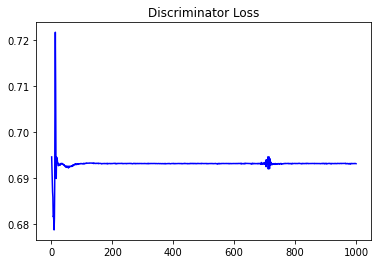

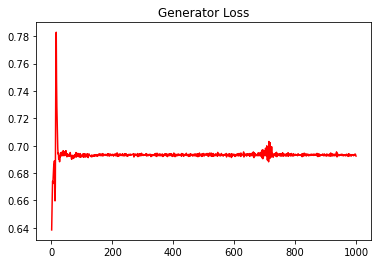

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06351291771885058


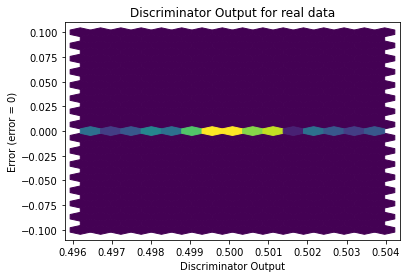

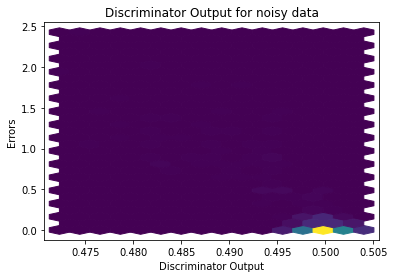

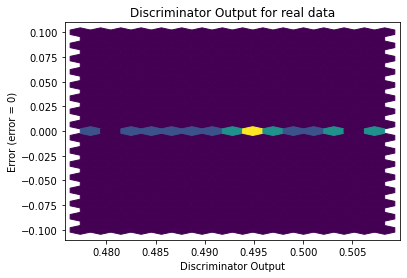

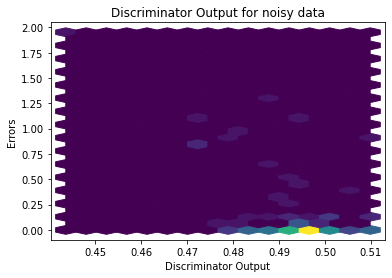

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


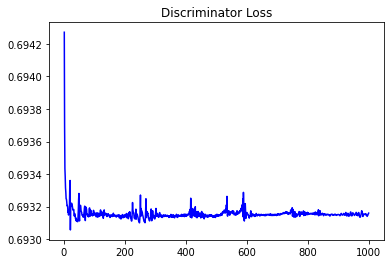

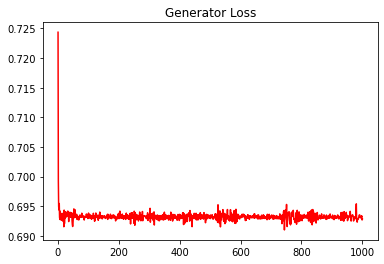

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11606932143720994


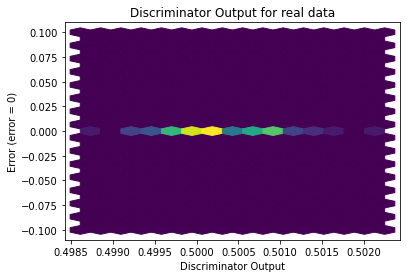

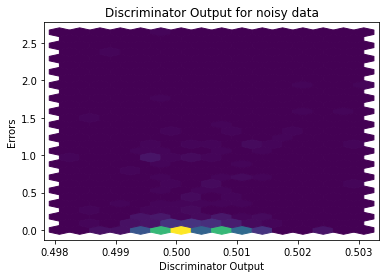

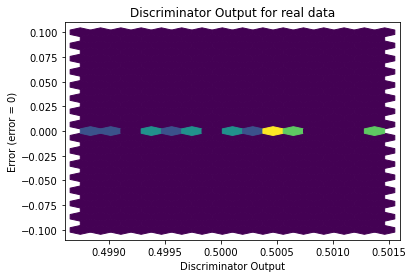

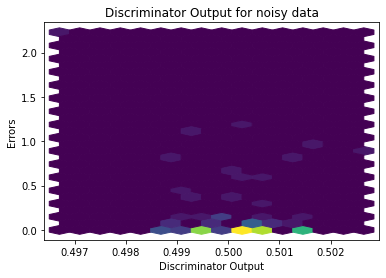

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0239]], requires_grad=True)
